In [1]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import os

In [2]:
#Lecture du fichier
datas = pd.read_csv("datasets" + os.sep + "Agribalyse_Synthese.csv", encoding="utf-8", sep=",",index_col=0)

In [3]:
#Copier le fichier pour le traiter ensuite
dataCopy = datas.copy()
dataCopy.head()

,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,Préparation,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
Code AGB,,,,,,,,,,,,,,,,,,,,,
11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,Pas de préparation,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088
11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,Pas de préparation,...,4.343632e-10,0.006246,0.000125,0.002379,0.012785,5.672531,20.508995,2.585763,12.701604,0.000007
11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,Pas de préparation,...,2.824785e-10,0.002036,0.000069,0.002197,0.006394,4.064650,18.871203,3.104146,6.275385,0.000004
11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,Pas de préparation,...,5.867577e-10,0.008112,0.000203,0.004050,0.031181,5.534832,36.288833,5.290335,12.553109,0.000005
20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,Pas de préparation,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088


In [4]:
#Enlever le code ciqual car inutile
dataCopy = dataCopy.drop("Code CIQUAL", axis=1)

Traitement des données qualitatives ordinales

In [20]:
for i in range(0,len(datas["Livraison"])):
    #print(dataCopy["Livraison"].iloc[i])
    if dataCopy["Livraison"].iloc[i] == "Ambiant (long)":
        dataCopy["Livraison"].iloc[i]=4
    elif dataCopy["Livraison"].iloc[i] == "Glacé":
        dataCopy["Livraison"].iloc[i] = 1
    elif dataCopy["Livraison"].iloc[i] == "Congelé":
        dataCopy["Livraison"].iloc[i] = 0
    elif dataCopy["Livraison"].iloc[i] == "Ambiant (moyen)":
        dataCopy["Livraison"].iloc[i] = 3
    elif dataCopy["Livraison"].iloc[i] == "Ambiant (court)":
        dataCopy["Livraison"].iloc[i] = 2
print("")

In [21]:
for i in range(0,len(datas["Matériau d'emballage"])):
    #print(dataCopy["Matériau d'emballage"].iloc[i])
    if dataCopy["Matériau d'emballage"].iloc[i] == "Pas d'emballage":
        dataCopy["Matériau d'emballage"].iloc[i]=0
    elif dataCopy["Matériau d'emballage"].iloc[i] == "Verre":
        dataCopy["Matériau d'emballage"].iloc[i]=1
    elif dataCopy["Matériau d'emballage"].iloc[i] == "LDPE":
        dataCopy["Matériau d'emballage"].iloc[i]=2
    elif dataCopy["Matériau d'emballage"].iloc[i] == "Carton":
        dataCopy["Matériau d'emballage"].iloc[i]=3
    elif dataCopy["Matériau d'emballage"].iloc[i] == "Aluminium":
        dataCopy["Matériau d'emballage"].iloc[i]=4
    elif dataCopy["Matériau d'emballage"].iloc[i] == "PVC":
        dataCopy["Matériau d'emballage"].iloc[i]=5
    elif dataCopy["Matériau d'emballage"].iloc[i] == "PS":
        dataCopy["Matériau d'emballage"].iloc[i]=6
    elif dataCopy["Matériau d'emballage"].iloc[i] == "PP":
        dataCopy["Matériau d'emballage"].iloc[i]=7
print("")

In [22]:
for i in range(0,len(datas["Préparation"])):
    #print(dataCopy["Préparation"].iloc[i])
    if dataCopy["Préparation"].iloc[i] == "Pas de préparation":
        dataCopy["Préparation"].iloc[i]=0
    elif dataCopy["Préparation"].iloc[i] == "Micro-onde " or dataCopy["Préparation"].iloc[i] == "Micro-onde":
        dataCopy["Préparation"].iloc[i]=1
    elif dataCopy["Préparation"].iloc[i] == "Cuisson à l'eau":
        dataCopy["Préparation"].iloc[i]=2
    elif dataCopy["Préparation"].iloc[i] == "Four " or dataCopy["Préparation"].iloc[i] == "Four":
        dataCopy["Préparation"].iloc[i]=3  
    elif dataCopy["Préparation"].iloc[i] == "Réfrigéré chez le consommateur":
        dataCopy["Préparation"].iloc[i]=4
    elif dataCopy["Préparation"].iloc[i] == "Poêle":
        dataCopy["Préparation"].iloc[i]=5 
    elif dataCopy["Préparation"].iloc[i] == "Friture":
        dataCopy["Préparation"].iloc[i]=6 
print("")

Vérification de la transformation des données qualitatives en données quantitatives

In [23]:
for j in dataCopy["Préparation"]:
    if type(j)==str:
        print(j)
    
        

In [24]:
for j in dataCopy["Livraison"]:
    if type(j)==str:
        print(j)

In [25]:
total = 0
for i in dataCopy.columns:
    for j in dataCopy[i]:
        if j == "":
            total += 1
            
print(total)

0


Regression linéaire

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dataCopy.select_dtypes(include=['number']).drop("DQR", axis=1)
y = datas["DQR"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Résultats réels :", y_test)
print("Résultats prédits :", y_pred)

Résultats réels : Code AGB
26022    3.46
18022    3.13
16411    3.65
13020    3.01
9231     2.15
         ... 
20536    3.16
7413     2.80
11034    3.75
6204     2.29
25509    1.75
Name: DQR, Length: 504, dtype: float64
Résultats prédits : [  3.78146181   2.73861508   2.56718408   2.50009829   2.73207578
   2.90630474   2.82266794   2.78473192   2.75795133   2.68168167
   2.6988547    2.92297771   2.72996495   2.70622635   2.71700761
   2.78438602   2.60179589   2.75913316   2.60179589   3.01042323
   2.50247493   2.73169426   2.65384358   2.60443144   2.79474683
   2.65789305   2.71782474   2.80885395   2.18817304   2.81886537
   2.65073401   2.72771254   2.68006093   2.70865879   2.75682684
   2.83440482   2.85159306   2.61829903   2.63363023   2.666186
   2.30996094   2.75225083   2.70310218   2.69904923   2.63505952
   2.76213258   2.53043623   2.7553262    2.72177684   2.76272935
   2.74776153   2.7182815    2.7358002    2.50977109   2.39381562
   2.68988868   2.68321069   2.75112

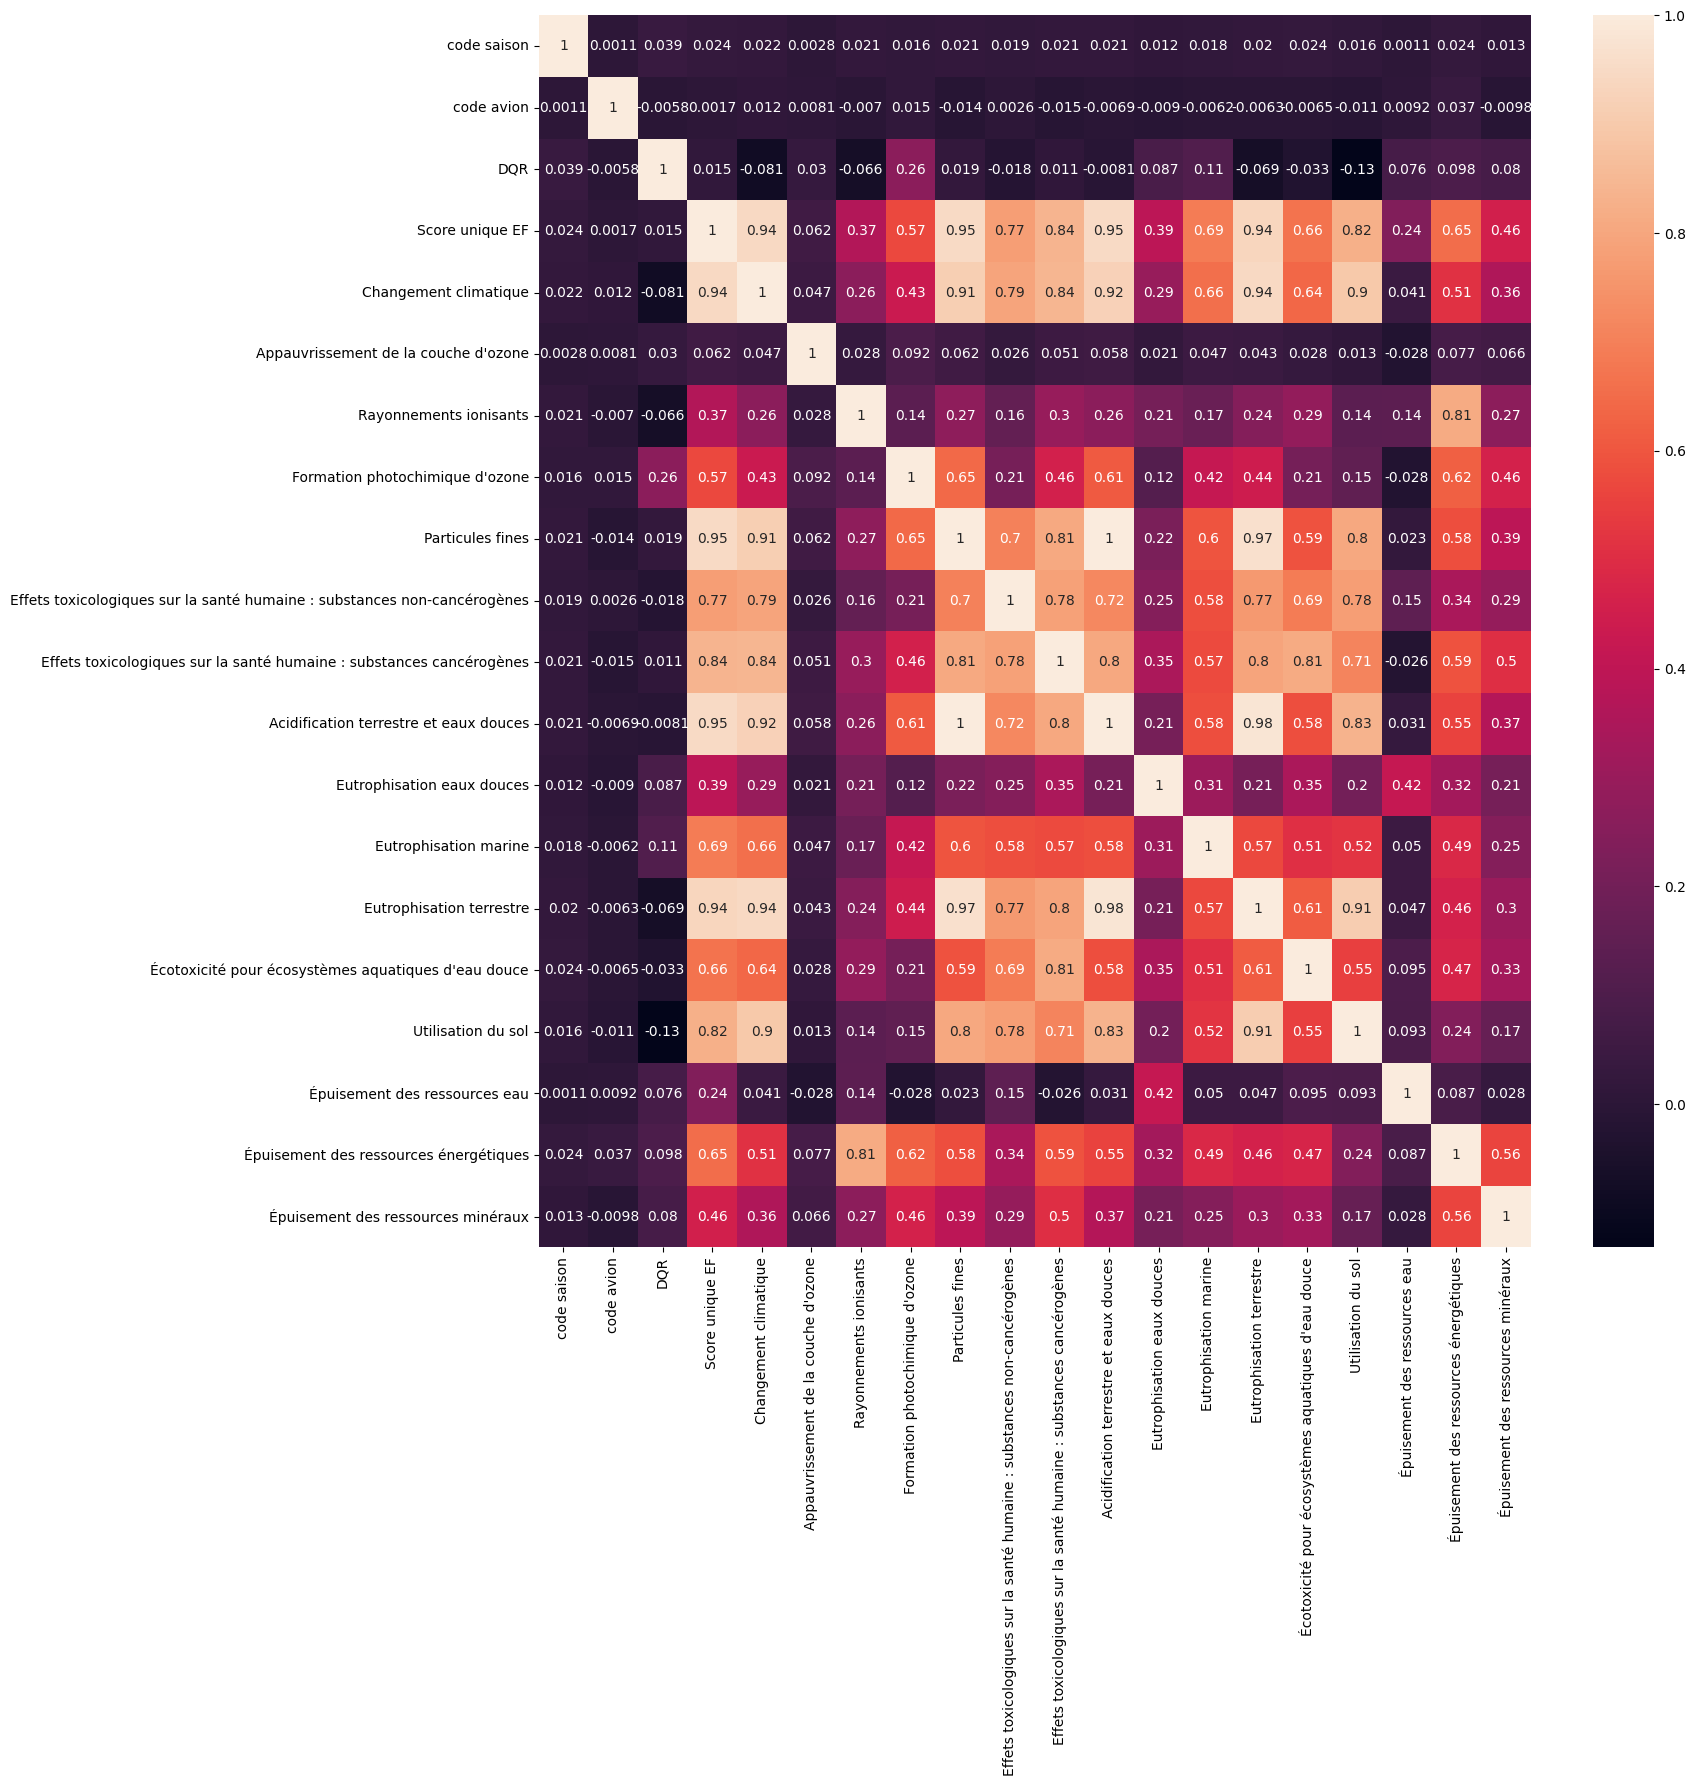

In [12]:
dataHeatMap = dataCopy.select_dtypes(exclude=['object'])
plt.figure(figsize=(16, 16))
sns.heatmap(dataHeatMap.corr(), annot=True)
plt.show()

In [13]:
dataCopy.describe()

,code saison,code avion,DQR,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000,2518.000000,2.518000e+03,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,1.997617,0.000794,2.768168,0.674660,5.352347,5.295133e-07,1.016800,0.021514,5.722425e-07,8.106852e-08,3.614483e-09,0.078641,0.000851,0.028298,0.308978,52.695938,319.016989,5.187148,49.166213,2.101284e-05
std,0.062987,0.028177,0.553070,0.856597,7.605873,4.873864e-06,1.602772,0.043885,8.831605e-07,1.328885e-07,4.619379e-09,0.127071,0.002070,0.050263,0.528213,64.363114,655.840955,19.500297,54.387211,4.273932e-05
min,0.000000,0.000000,1.200000,0.012941,0.039161,2.711347e-09,0.023043,0.000120,5.374447e-09,1.041913e-09,5.612756e-11,0.000490,0.000013,0.000213,0.001103,0.660594,-42.220580,-222.183850,1.710196,6.177173e-07
25%,2.000000,0.000000,2.380000,0.157586,1.111978,1.184973e-07,0.301996,0.003565,8.112941e-08,1.743184e-08,8.915459e-10,0.009368,0.000202,0.005295,0.033723,13.187684,33.445734,0.793924,19.787166,7.176604e-06
50%,2.000000,0.000000,2.680000,0.349165,2.448059,2.030205e-07,0.668826,0.007197,2.373566e-07,3.792691e-08,2.181853e-09,0.031714,0.000445,0.012962,0.117878,33.997363,120.790285,2.057243,30.596413,1.247782e-05
75%,2.000000,0.000000,3.090000,0.862760,6.222165,5.523210e-07,1.116586,0.018092,7.068223e-07,7.240328e-08,4.657096e-09,0.088815,0.000865,0.028895,0.331958,61.935446,288.546528,5.336188,61.166026,2.388837e-05
max,2.000000,1.000000,4.870000,5.813351,50.917912,2.433486e-04,30.373306,0.389954,6.190059e-06,1.546013e-06,6.289898e-08,0.912512,0.032660,0.670953,4.038975,1085.818340,5525.755000,477.447230,710.666870,1.286939e-03


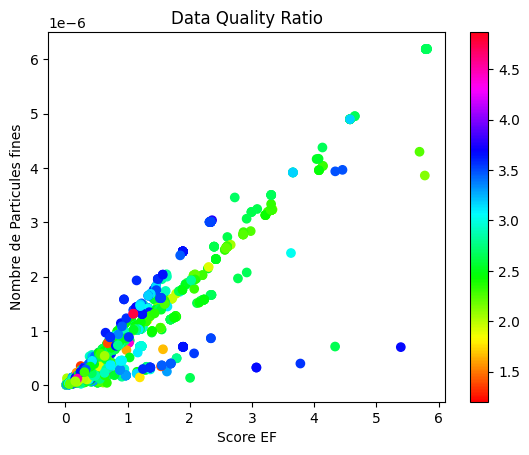

In [14]:
plt.scatter(x=dataCopy['Score unique EF'].values,y = dataCopy['Particules fines'].values,c = dataCopy["DQR"].values, cmap='hsv')
plt.xlabel('Score EF')
plt.ylabel('Nombre de Particules fines')
plt.title('Data Quality Ratio')
plt.colorbar()
plt.show()


# Régression linéaire multi-variée 

Nous allons trouver la relation entre les sales et les différents types d'investissment. Ensuite, nous allons étudier le caractère significatif partiel et total de la regression. 


In [15]:
X_ = dataCopy.select_dtypes(include=['number']).drop("DQR", axis=1)
y_ = datas["DQR"]

#créer un objet reg lin
modeleReg=LinearRegression()

modeleReg.fit(X_,y_)

results = {
 "label":["constante"]+list(X_.columns)+["Score"],
  "coeff": np.concatenate((modeleReg.intercept_.reshape(1,-1), modeleReg.coef_,modeleReg.score(X_,y_)), axis=None),
}

pd.DataFrame(results)

,label,coeff
0,constante,2.014118e+00
1,code saison,3.599619e-01
2,code avion,4.276826e-01
3,Score unique EF,1.485378e+01
4,Changement climatique,-4.630224e-01
5,Appauvrissement de la couche d'ozone,-1.678690e+04
6,Rayonnements ionisants,-2.296004e-01
7,Formation photochimique d'ozone,-1.693863e+01
8,Particules fines,-3.867596e+05
9,Effets toxicologiques sur la santé humaine : s...,-1.213743e+06


## Caractère signicatif conjoint des coefficients 

On calcule les caractéristiques en terme de SCE, SCR et SCT de cette régression. Le premier test d'hypothèse consiste à savoir le caractère significatif total de la régression. 

In [16]:
import statistics
#calcul de SCR
SCR =((y_-modeleReg.predict(X_))**2).sum() 
#calcul de SCT
SCT =((y_-statistics.mean(y_))**2).sum() 
#calcul de SCE
SCE =((modeleReg.predict(X_)-statistics.mean(y_))**2).sum() 
n = len(y_)
p = X_.shape[1]
R = SCE/SCT; 
F = (SCE/p)/(SCR/(n-p-1))

results = {
 "label":["SCR"]+["SCE"]+["SCT"]+["Score R2"] + ["Fisher"],
  "coeff": np.concatenate((SCR, SCE,SCT, R, F),axis=None),
}

pd.DataFrame(results)

,label,coeff
0,SCR,608.717438
1,SCE,161.199305
2,SCT,769.916743
3,Score R2,0.209372
4,Fisher,34.816592


## Caractère significatif partiel de la régression 

Ensuite, nous allons nous interesser au caractère significatif partiel de la régression. Nous devrons pour cela retrouver la matrice de covariance et retrouver son inverse. 

On commence d'abord par retrouver les variables explicatives centrées et réduites. Pour chaque colonne X on retranche la moyenne et on normalise par la variance. Un package scaler de Python permet de faire cette opération. 

In [17]:
# Pour retrouver la matrice de covariance 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
# suppression de la colonne Annual
scale = scaler.set_output(transform="pandas")

# Il faudra toujours trouver les variables centrées et réduites
scaled_db = scale.fit_transform(X_)


In [18]:
n = scaled_db.shape[0]
p = scaled_db.shape[1]
S = np.zeros((n,p)); 
for i,x in enumerate(X_.columns):
    S[:,i] = np.array(scaled_db[x])
Rxx = np.dot(S.T,S)
print('La matrice de covariance est :')
pd.DataFrame(Rxx)

La matrice de covariance est :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2518.000000,2.686269,59.390537,54.384901,7.157085,52.601459,39.857207,53.632445,46.639056,51.776360,53.771650,29.951261,46.504155,51.281757,59.840490,39.054105,2.732169,59.348272,33.516580
1,2.686269,2518.000000,4.302413,29.899030,20.444051,-17.713765,39.020993,-35.083560,6.538056,-38.510795,-17.309957,-22.592398,-15.573104,-15.827814,-16.256391,-26.663754,23.135129,93.119570,-24.743489
2,59.390537,4.302413,2518.000000,2373.501812,156.919069,922.803034,1428.941776,2390.715767,1951.064533,2116.216232,2389.172273,984.510369,1730.515784,2356.245387,1673.000945,2076.289537,599.839701,1641.215732,1147.511319
3,54.384901,29.899030,2373.501812,2518.000000,117.877375,660.580718,1082.877107,2302.238451,2000.009852,2118.021415,2326.049534,740.644089,1650.133269,2374.760657,1610.167383,2254.389919,104.008981,1288.722777,901.680748
4,7.157085,20.444051,156.919069,117.877375,2518.000000,71.466299,231.855108,155.860630,64.749813,127.193319,145.982954,53.582919,117.692675,107.531402,70.884430,32.488752,-71.245203,193.661854,165.604691
5,52.601459,-17.713765,922.803034,660.580718,71.466299,2518.000000,342.973824,685.267232,396.990462,748.093285,667.161930,523.082304,438.574057,616.243121,720.566285,345.634922,357.506684,2047.483734,679.598789
6,39.857207,39.020993,1428.941776,1082.877107,231.855108,342.973824,2518.000000,1627.386990,533.172005,1152.370255,1528.742718,293.903937,1055.511423,1111.183884,524.487213,378.833314,-70.527649,1563.041696,1167.967085
7,53.632445,-35.083560,2390.715767,2302.238451,155.860630,685.267232,1627.386990,2518.000000,1770.708304,2037.880688,2508.827323,550.998846,1504.707999,2435.818237,1486.265226,2026.949305,57.422783,1469.967712,990.309829
8,46.639056,6.538056,1951.064533,2000.009852,64.749813,396.990462,533.172005,1770.708304,2518.000000,1974.966207,1809.988579,621.682881,1470.432222,1927.295686,1733.149572,1955.687200,367.714220,864.045331,736.406620
9,51.776360,-38.510795,2116.216232,2118.021415,127.193319,748.093285,1152.370255,2037.880688,1974.966207,2518.000000,2023.884536,870.830552,1439.799205,2005.578475,2047.682565,1784.569664,-64.303912,1490.523445,1260.325589


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler() 
# suppression des colonnes string
db = dataCopy.drop(columns = ["Groupe d'aliment","Sous-groupe d'aliment","Nom du Produit en Français","LCI Name","Matériau d'emballage"])
scale = scaler.set_output(transform="pandas")

# Il faudra toujours trouver les variables centrées et réduites
scaled_db = scale.fit_transform(db)

pca = PCA()
pca.fit(scaled_db)

PCA()

In [118]:
oneit_db = dataCopy.copy()
alist = []
mask = []

for i, x in enumerate(oneit_db["Sous-groupe d'aliment"]):
    if x in alist:
        mask.append(False)
    else:
        mask.append(True)
        alist.append(x)

# Apply the mask to create a new DataFrame
filtered_oneit_db = oneit_db[mask]

print(alist)
filtered_oneit_db


['algues', 'herbes', 'ingrédients divers', 'épices', 'aides culinaires', 'sauces', 'sels', 'condiments', 'denrées destinées à une alimentation particulière', 'céréales et biscuits infantiles', 'laits et boissons infantiles', 'desserts infantiles', 'petits pots salés et plats infantiles', 'boisson alcoolisées', 'boissons sans alcool', 'eaux', 'plats composés', 'feuilletées et autres entrées', 'soupes', 'plats végétariens', 'sandwichs', 'pizzas, tartes et crêpes salées', 'salades composées et crudités', 'fruits', 'fruits à coque et graines oléagineuses', 'légumes', 'pommes de terre et autres tubercules', 'légumineuses', 'glaces', 'desserts glacés', 'sorbets', 'fromages', 'produits laitiers frais et assimilés', 'crèmes et spécialités à base de crème', 'laits', 'beurres', 'huiles et graisses végétales', 'autres matières grasses', 'huiles de poissons', 'margarines', 'pâtes, riz et céréales', 'farines et pâtes à tarte', 'gâteaux et pâtisseries', 'pains et viennoiseries', 'céréales de petit-d

,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,Préparation,DQR,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
Code AGB,,,,,,,,,,,,,,,,,,,,,
11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,4,2,0,2.990000,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088
11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,4,1,0,4.110000,...,4.343632e-10,0.006246,0.000125,0.002379,0.012785,5.672531,20.508995,2.585763,12.701604,0.000007
37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,2,0,4,3,0,2.890000,...,1.281360e-09,0.019283,0.000310,0.006705,0.079039,19.241559,94.993989,0.449383,23.187248,0.000017
11025,aides culinaires et ingrédients divers,épices,"Cannelle, poudre","Cinnamon, powder",2,0,4,1,0,3.370000,...,3.090506e-09,0.088815,0.001451,0.069161,0.554170,160.566140,696.690070,18.363092,71.837424,0.000115
11172,aides culinaires et ingrédients divers,aides culinaires,"Court-bouillon pour poissons, déshydraté","Aromatic stock cube, for fish, dehydrated",2,0,4,4,0,3.550000,...,6.812990e-09,0.069943,0.002822,0.029954,0.187664,63.714656,112.324030,9.179842,710.666870,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25224,"viandes, œufs, poissons",substituts de viande,Bouchées ou émincé au soja et blé (ne convient...,Soy-based sliced,2,0,1,7,5,1.963951,...,1.984023e-09,0.013444,0.000553,0.008807,0.037633,49.793218,110.728050,0.816975,95.339030,0.000013
10037,"viandes, œufs, poissons",mollusques et crustacés cuits,"Calmar ou calamar ou encornet, bouilli/cuit à ...","Squid, boiled/cooked in water",2,0,1,6,2,3.520000,...,4.080865e-09,0.181748,0.000255,0.043975,0.480719,23.690577,15.027532,0.406132,99.227548,0.000023
10001,"viandes, œufs, poissons",mollusques et crustacés crus,"Calmar ou calamar ou encornet, cru","Squid, raw",2,0,1,6,0,3.640000,...,3.351617e-09,0.148832,0.000265,0.036439,0.394305,21.029986,12.360117,0.329260,76.736600,0.000018


In [108]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(22)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,9.200638e+00,42.0,42.0
1,Dim2,1.891004e+00,9.0,50.0
2,Dim3,1.475095e+00,7.0,57.0
3,Dim4,1.342508e+00,6.0,63.0
4,Dim5,1.051651e+00,5.0,68.0
5,Dim6,1.006520e+00,5.0,73.0
6,Dim7,9.970102e-01,5.0,77.0
7,Dim8,9.798852e-01,4.0,82.0
8,Dim9,7.941727e-01,4.0,85.0
9,Dim10,7.585755e-01,3.0,89.0


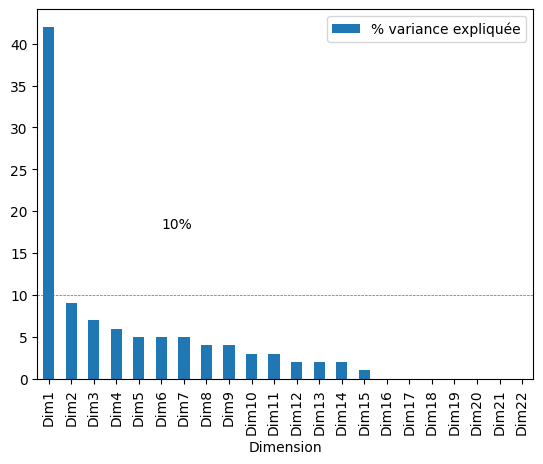

In [109]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "10%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [119]:
db_pca = pca.transform(scaled_db)

In [120]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : db_pca[:,0], 
    "Dim2" : db_pca[:,1],
    "G Al" : dataCopy["Groupe d'aliment"],
    "SG Al" : dataCopy["Sous-groupe d'aliment"],
    "Mat" : dataCopy["Matériau d'emballage"],
})

# Résultat
data_pca_df

,Dim1,Dim2,G Al,SG Al,Mat
Code AGB,,,,,
11084,2.194340,5.940224,aides culinaires et ingrédients divers,algues,2
11023,-2.288594,0.238617,aides culinaires et ingrédients divers,herbes,1
11000,-2.428554,-0.104708,aides culinaires et ingrédients divers,herbes,0
11093,-2.243245,0.053441,aides culinaires et ingrédients divers,herbes,2
20995,2.194340,5.940224,aides culinaires et ingrédients divers,algues,2
...,...,...,...,...,...
6535,5.373152,-0.733203,"viandes, œufs, poissons",viandes crues,6
6582,5.791185,-0.741388,"viandes, œufs, poissons",viandes cuites,6
26146,0.513421,2.016161,"viandes, œufs, poissons",poissons crus,6


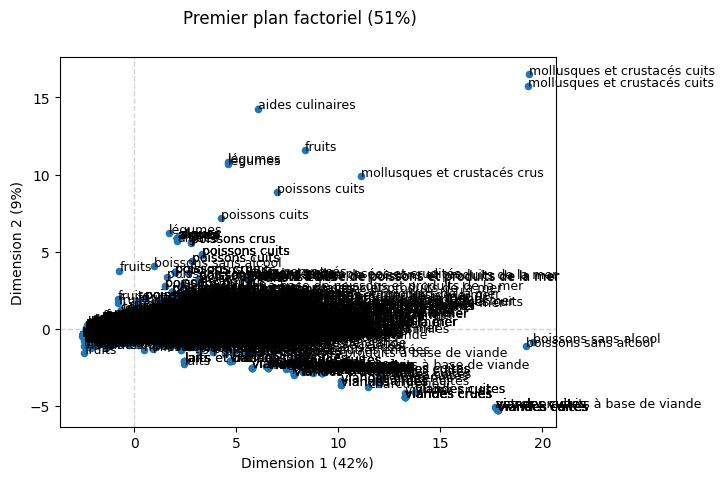

In [117]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
fig.suptitle("Dimensions réduites")
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique
# Ajout des axes
ax.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
ax.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# boucle sur chaque pays
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
        ax.annotate(k[1]["SG Al"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (42%)") 
plt.ylabel("Dimension 2 (9%)")
plt.suptitle("Premier plan factoriel (51%)")
plt.show()

In [54]:
n = db.shape[0] # nb individus
p = db.shape[1] # nb variables

print(n)
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': db.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

2518


,id,COR_1,COR_2
0,code saison,0.028896,0.036334
1,code avion,-0.001801,0.030016
2,Livraison,-0.359906,-0.072316
3,Préparation,0.290951,0.045251
4,DQR,0.001950,0.352532
5,Score unique EF,0.984408,0.003329
6,Changement climatique,0.947089,-0.211675
7,Appauvrissement de la couche d'ozone,0.067124,0.114923
8,Rayonnements ionisants,0.383295,0.570439
9,Formation photochimique d'ozone,0.559914,0.428708


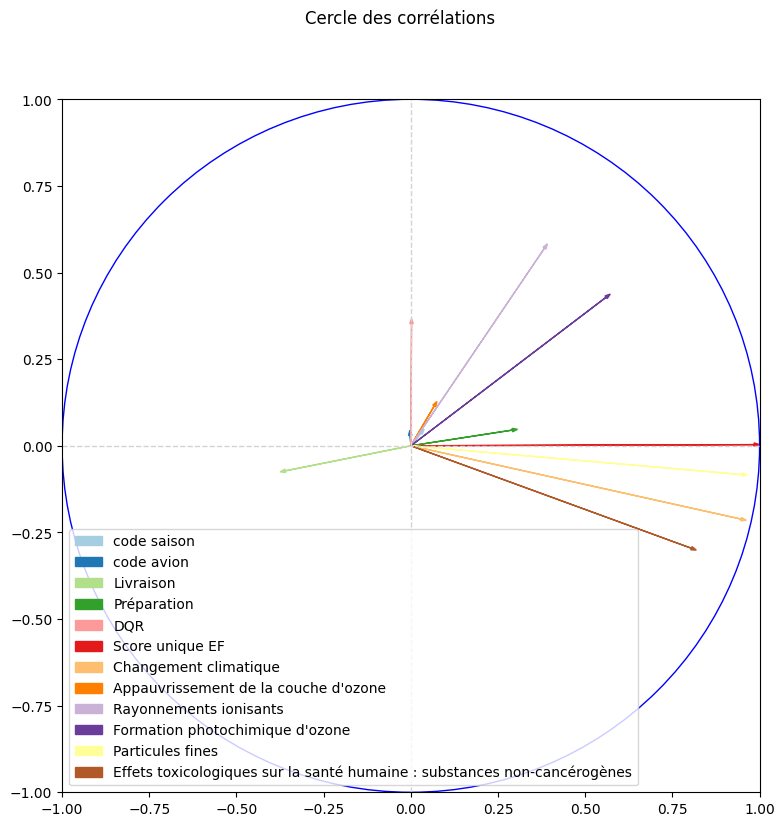

In [124]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)

pal = sns.color_palette("Paired")
couleurs = dict(zip(coordvar["id"], pal))
fig, axes = plt.subplots(figsize = (9,9))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(12):
    #axes.text(coordvar["COR_1"][j] ,coordvar["COR_2"][j], coordvar["id"][j],color='red')
    plt.arrow(0, 0,
              coordvar["COR_1"][j],
              coordvar["COR_2"][j],
              color=couleurs[coordvar["id"][j]],
              label = coordvar["id"][j],
              head_width = 0.01,
              width=0.0001,
             )
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.legend()
plt.show()

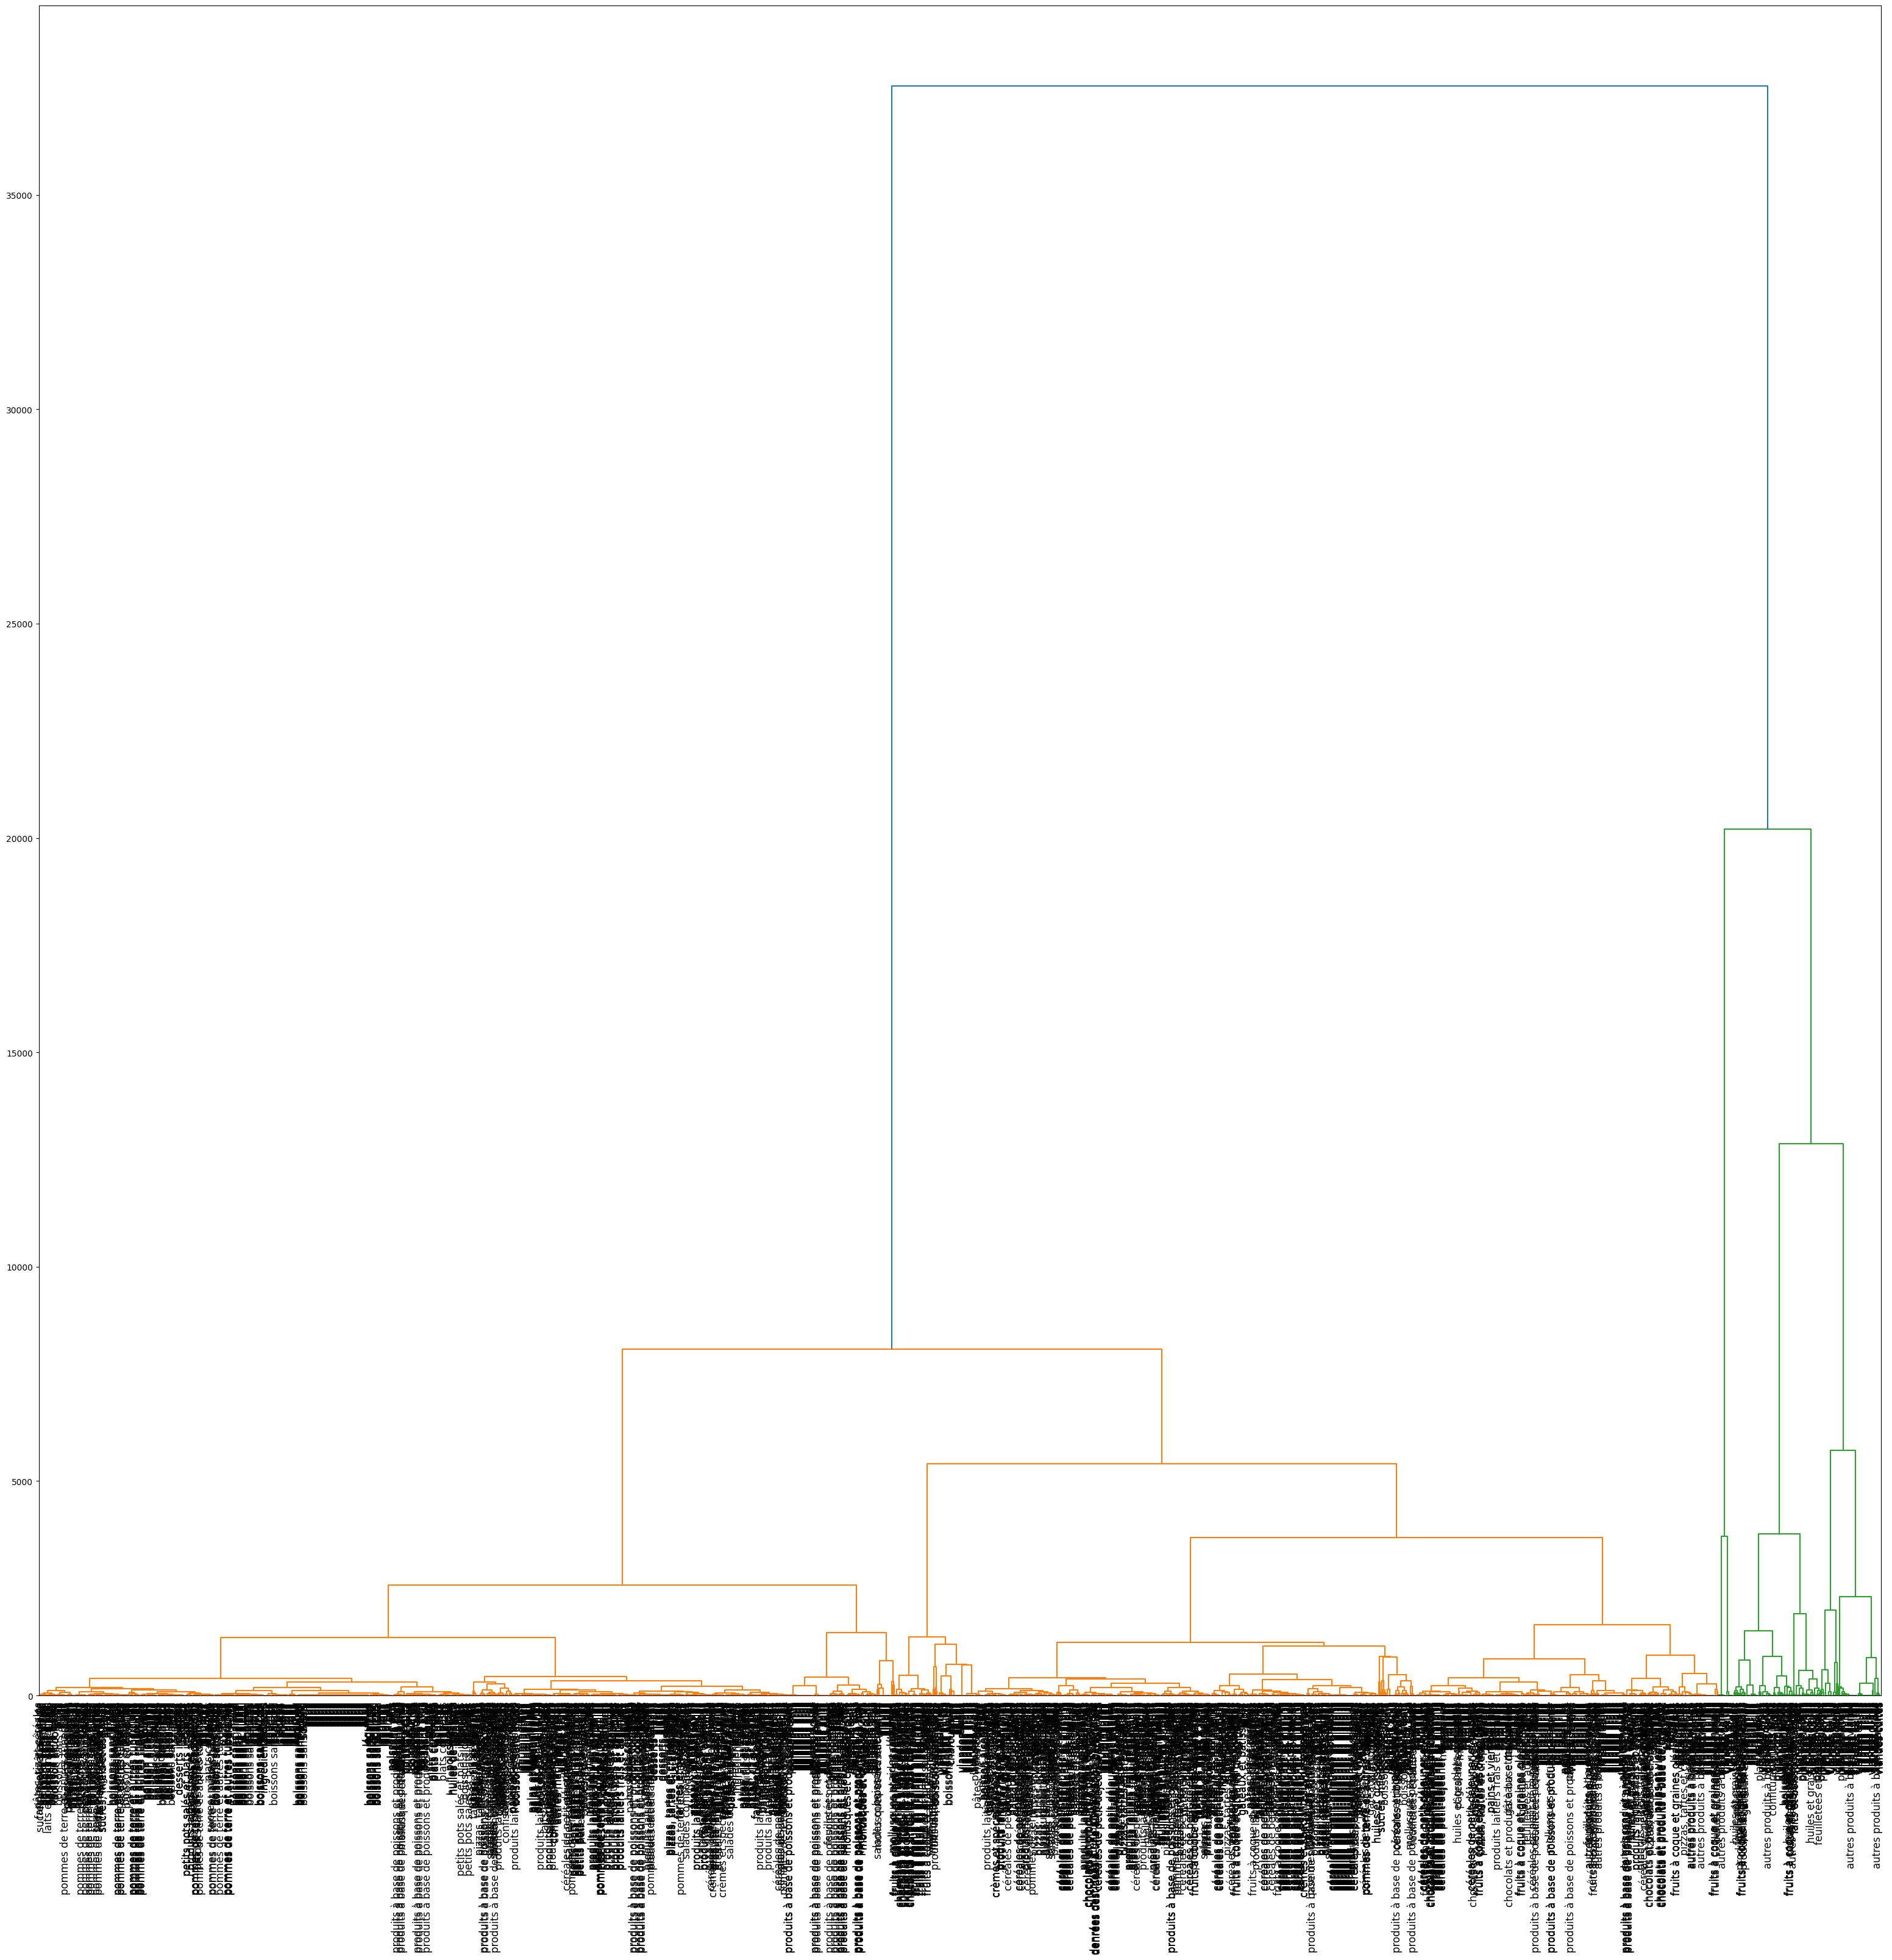

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

labelList = list(dataCopy["Sous-groupe d'aliment"])
Z2 = linkage(db, method='ward', metric='euclidean')
plt.figure(figsize=(39, 36))
dendrogram(
    Z2,
    leaf_rotation= 90,
    labels=labelList,
    distance_sort='ascending',
    show_leaf_counts=False,
    leaf_font_size=12
)
plt.show()


In [121]:
from sklearn.cluster import KMeans

kmeansn = KMeans(n_clusters = 2)
kmeansn.fit(db)
kmeansn.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 1.99747581e+00,  8.41396719e-04,  2.31257888e+00,
         6.89524611e-01,  2.78775596e+00,  5.26097752e-01,
         3.86269844e+00,  5.17289730e-07,  9.92558990e-01,
         1.98401804e-02,  4.22759562e-07,  5.74282920e-08,
         2.93904150e-09,  5.61991060e-02,  7.77436004e-04,
         2.25630327e-02,  2.07953832e-01,  4.56992390e+01,
         1.84001117e+02,  4.95468355e+00,  4.68716909e+01,
         1.95463815e-05],
       [ 2.00000000e+00, -3.25260652e-19,  1.18439716e+00,
         1.70212766e+00,  2.43794326e+00,  3.17914399e+00,
         3.04650682e+01,  7.35580351e-07,  1.42546011e+00,
         4.97403168e-02,  3.09224907e-06,  4.79599141e-07,
         1.50011898e-08,  4.56964987e-01,  2.08515738e-03,
         1.24979626e-01,  2.01205595e+00,  1.70647388e+02,
         2.59513562e+03,  9.10606686e+00,  8.78476166e+01,
         4.57346393e-05]])

In [74]:
pd.Series(kmeansn.labels_).value_counts()

0    2377
1     141
Name: count, dtype: int64

In [75]:
db_kn = db.assign(classe = kmeansn.labels_)
db_kn.groupby("classe").mean()

,code saison,code avion,Livraison,Préparation,DQR,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
classe,,,,,,,,,,,,,,,,,,,,,
0,1.997476,0.000841,2.312579,0.689525,2.787756,0.526098,3.862698,5.172897e-07,0.992559,0.01984,...,2.939042e-09,0.056199,0.000777,0.022563,0.207954,45.699239,184.001117,4.954684,46.871691,0.000020
1,2.000000,0.000000,1.184397,1.702128,2.437943,3.179144,30.465068,7.355804e-07,1.425460,0.04974,...,1.500119e-08,0.456965,0.002085,0.124980,2.012056,170.647388,2595.135623,9.106067,87.847617,0.000046


<generator object DataFrame.iterrows at 0x136d04d00>


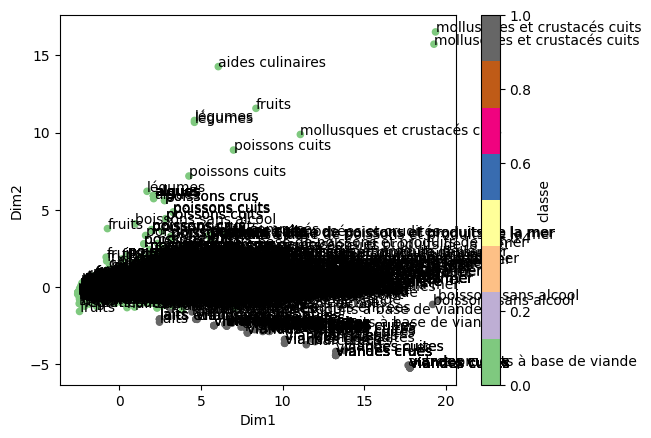

In [122]:
db_pca_kn = data_pca_df.assign(classe = kmeansn.labels_, sg = dataCopy["Sous-groupe d'aliment"])

coul_kmeans = dict(zip(db_pca_kn["classe"].unique(), (range(4))))

fig, ax = plt.subplots()

db_pca_kn.plot('Dim1', 'Dim2', kind='scatter', c = "classe",cmap = "Accent", ax=ax)

print(db_pca_kn.iterrows())
for index, row in db_pca_kn.iterrows():
    ax.annotate(row['sg'], (row['Dim1'], row['Dim2']))

plt.show()


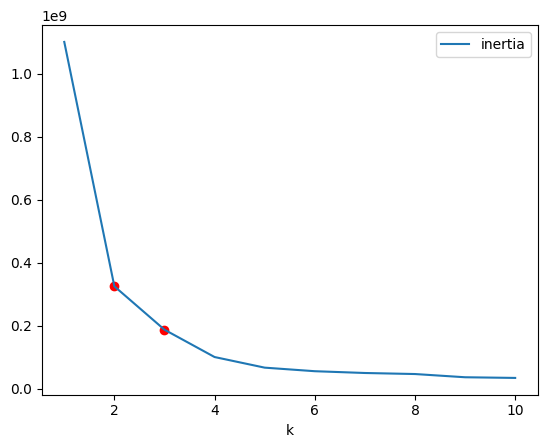

In [123]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(db)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()